In [7]:
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt
df = pd.read_json("https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json")

In [8]:
print(df.head())

           name  gt_corners  rb_corners       mean        max       min   
0  Schlafzimmer           4           4   3.956313   8.562939  0.274574  \
1         Küche           4           4  23.019122  52.605437  0.724299   
2      Bathroom           4           4   1.013833   1.950322  0.301673   
3  Lounge/Diner           8           8   3.832620  18.236935  0.173307   
4    Essbereich           4           4   8.017758  15.642853  0.762948   

   floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  ceiling_min  
0    3.987864   8.562939   0.274574      3.924762     8.501885     0.331494  
1    1.253103   1.897612   0.724299     44.785141    52.605437    36.880814  
2    0.659138   1.318714   0.301673      1.368528     1.950322     0.878106  
3    3.600083  15.041431   0.173307      4.065157    18.236935     0.253457  
4    7.819446  15.399635   0.762948      8.216069    15.642853     0.909029  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB
None


In [10]:
print(df.describe(exclude=['O']))

        gt_corners   rb_corners         mean          max          min   
count  1347.000000  1347.000000  1347.000000  1347.000000  1347.000000  \
mean      4.307350     4.307350    12.895320    25.448011     2.920388   
std       0.814412     0.814412    21.839948    42.758159     9.258972   
min       4.000000     4.000000     0.192973     0.323886     0.007456   
25%       4.000000     4.000000     0.658488     1.243804     0.147432   
50%       4.000000     4.000000     2.123456     4.703514     0.279876   
75%       4.000000     4.000000    14.810982    28.312051     0.674444   
max      10.000000    10.000000   121.301055   179.165483    81.764483   

        floor_mean    floor_max    floor_min  ceiling_mean  ceiling_max   
count  1347.000000  1347.000000  1347.000000   1347.000000  1347.000000  \
mean     11.022443    20.405499     3.146246     14.768198    24.848020   
std      19.136320    33.189081     9.559611     26.047057    42.345579   
min       0.134686     0.178059  

<Axes: title={'center': 'Heatmap'}>

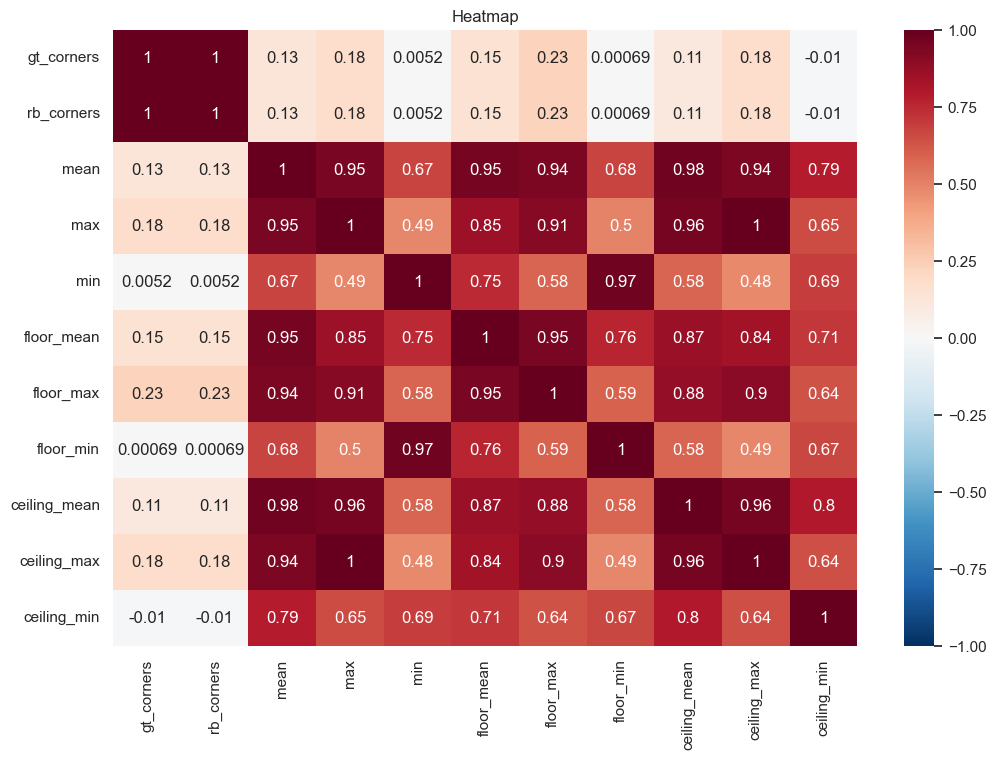

In [11]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 8))
plt.title("Heatmap")
sns.heatmap(
df.corr(numeric_only=True),
        cmap='RdBu_r',  # задаёт цветовую схему
        annot=True,  # рисует значения внутри ячеек
        vmin=-1, vmax=1)  # указывает начало цветовых кодов от -1 до 1.

Text(0, 0.5, 'Number of corners found by the model')

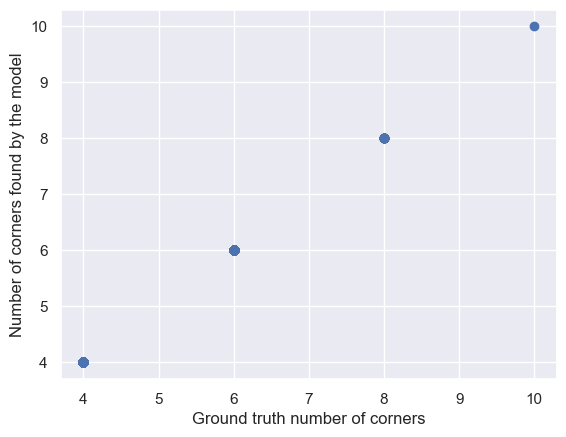

In [12]:
plt.scatter(df["gt_corners"], df["rb_corners"])
plt.xlabel("Ground truth number of corners")
plt.ylabel("Number of corners found by the model")

Text(0, 0.5, 'Number of rooms')

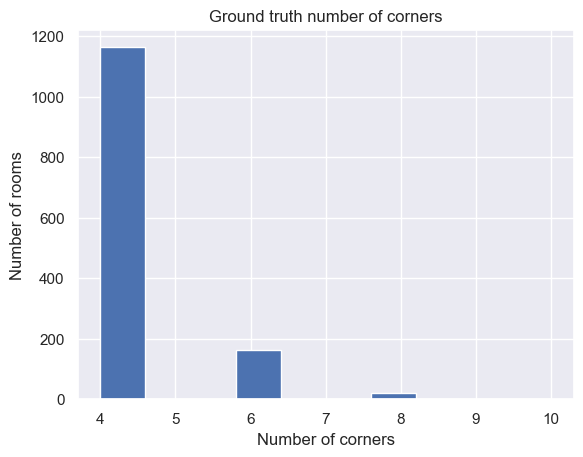

In [13]:
plt.hist(df["gt_corners"])
plt.title("Ground truth number of corners")
plt.xlabel("Number of corners")
plt.ylabel("Number of rooms")

Text(0, 0.5, 'Number of rooms')

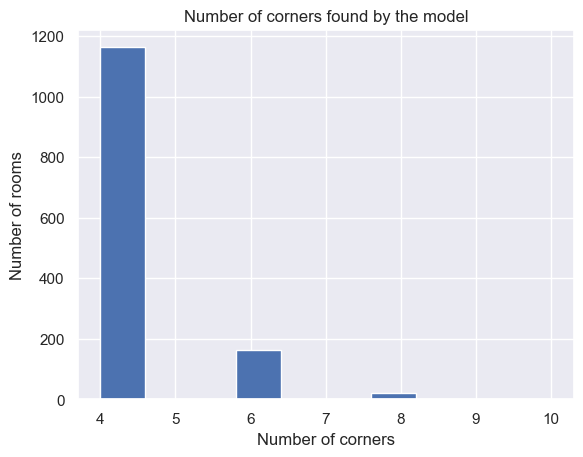

In [14]:
plt.hist(df["rb_corners"])
plt.title("Number of corners found by the model")
plt.xlabel("Number of corners")
plt.ylabel("Number of rooms")

Text(0.5, 1.0, 'Scatterplot gt_corners')

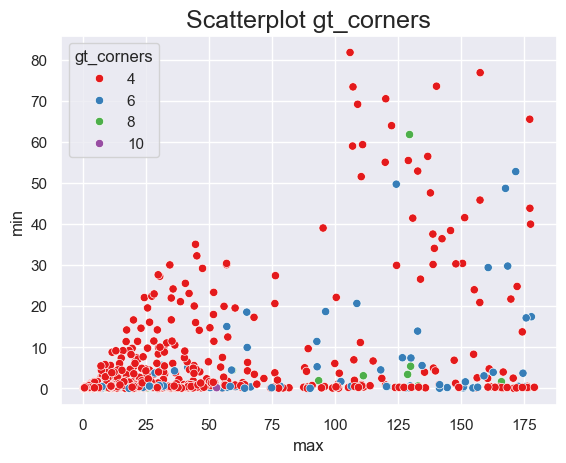

In [15]:
sns.scatterplot(data=df, x="max", y="min", hue="gt_corners", palette="Set1")
plt.title("Scatterplot gt_corners", fontsize=18)

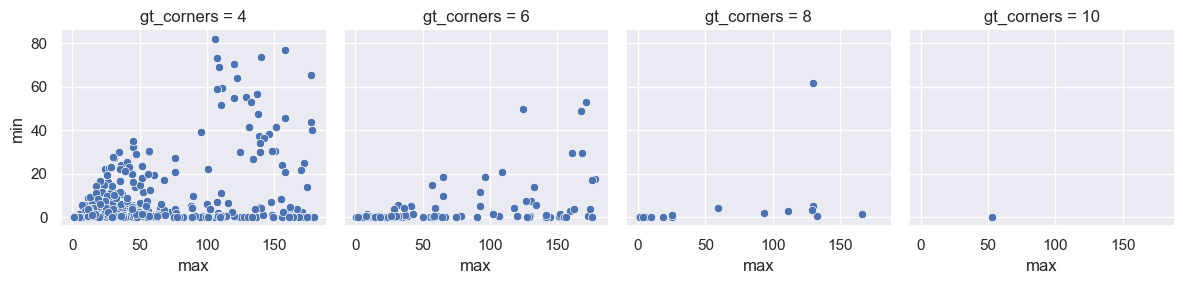

In [16]:
face_grid = sns.FacetGrid(df, col="gt_corners")
face_grid.map(sns.scatterplot, "max", "min")

Text(0.5, 1.0, 'Boxplot')

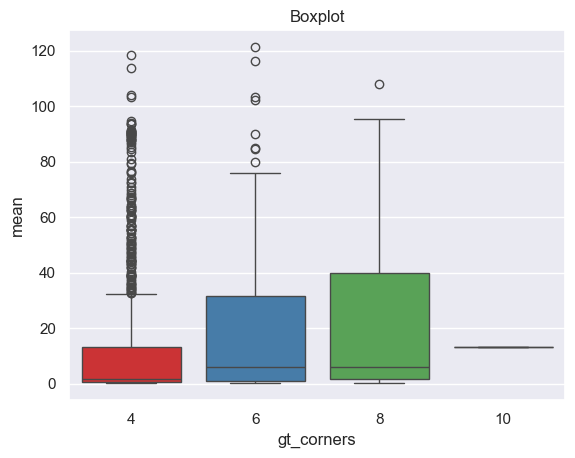

In [17]:
sns.boxplot(x='gt_corners',
            y='mean',
            data=df,
            palette="Set1")
plt.title("Boxplot")

Text(0.5, 1.0, 'Barplot')

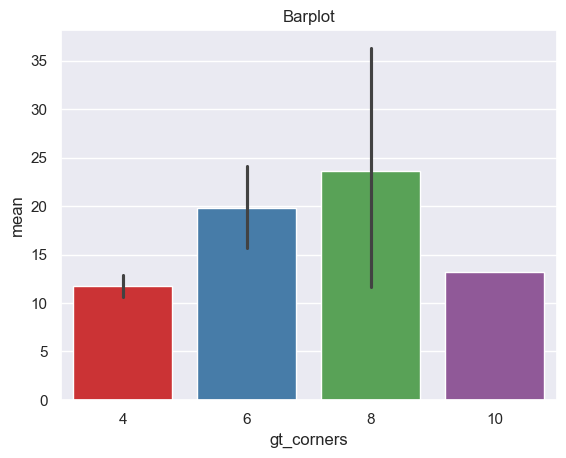

In [18]:
sns.barplot(data=df, x='gt_corners', y='mean', palette="Set1")
plt.title("Barplot")